In [1]:
import re
import json
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
f = open('darkgames/rating.json')

js = json.load(f)

In [3]:
nn_jj = []
nd = {}

for line in js:
    if 'title' in line:
        nd = {}
        nn_jj.append(nd)
        nd['title'] = line['title'][0].split("'")[1]
    elif 'reported' in line:
        try:
            nd[line['reported'][1]] = line['reported'][3]
        except:
            pass
    elif 'price' in line:
        nd['Price'] = line['price'][0].strip().split(':')[1].strip()
        nd['Ads'] = line['price'][1].strip().split(':')[1].strip()
        nd['In App Purchases'] = line['price'][2].strip().split(':')[1].strip()

In [4]:
print(nn_jj[0])

{'title': 'Jurassic Park™ Builder', 'Price': 'Free', 'Ads': 'Yes', 'In App Purchases': 'Yes'}


In [5]:
with open('drating_cleaned.json', 'w') as f:
    json.dump(nn_jj, f)

In [6]:
df = pd.read_json('drating_cleaned.json')

In [7]:
df

,title,Price,Ads,In App Purchases,Temporal Dark Patterns,Monetary Dark Patterns,Social Dark Patterns,Psychological Dark Patterns
0,Jurassic Park™ Builder,Free,Yes,Yes,NaN,NaN,NaN,NaN
1,Knife Hit,Free,Yes,Yes,This game has 7 reported Temporal Dark Pattern...,This game has 11 reported Monetary Dark Patter...,This game has 7 reported Social Dark Patterns....,This game has 7 reported Psychological Dark Pa...
2,Walking Dead: Road to Survival,Free,Yes,Yes,This game has 27 reported Temporal Dark Patter...,This game has 44 reported Monetary Dark Patter...,This game has 26 reported Social Dark Patterns...,This game has 28 reported Psychological Dark P...
3,Unison League,Free,Yes,Yes,This game has 12 reported Temporal Dark Patter...,This game has 19 reported Monetary Dark Patter...,This game has 11 reported Social Dark Patterns...,This game has 10 reported Psychological Dark P...
4,War and Peace: Build an Army in the Epic Civil...,Free,Yes,Yes,This game has 7 reported Temporal Dark Pattern...,This game has 8 reported Monetary Dark Pattern...,This game has 5 reported Social Dark Patterns....,This game has 4 reported Psychological Dark Pa...
...,...,...,...,...,...,...,...,...
26777,Sasaya,$0.99,No,No,NaN,NaN,NaN,NaN
26778,Perfect Ironing,Free,Yes,No,NaN,NaN,NaN,NaN
26779,R.B.I. Baseball 20,$3.99,No,No,NaN,NaN,NaN,NaN
26780,Colorzzle,$0.99,No,No,NaN,NaN,NaN,NaN


In [8]:
dark_patterns_df = df[['Temporal Dark Patterns', 'Monetary Dark Patterns', 
                       'Social Dark Patterns', 'Psychological Dark Patterns']].dropna()

In [9]:
dark_patterns_df['Temporal Dark Patterns Present'] = dark_patterns_df['Temporal Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group()))
dark_patterns_df['Monetary Dark Patterns Present'] = dark_patterns_df['Monetary Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group()))
dark_patterns_df['Social Dark Patterns Present'] = dark_patterns_df['Social Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group()))
dark_patterns_df['Psychological Dark Patterns Present'] = dark_patterns_df['Psychological Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group()))

dark_patterns_df['Temporal Dark Patterns Absence'] = dark_patterns_df['Temporal Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x.split('.')[1]).group()))
dark_patterns_df['Monetary Dark Patterns Absence'] = dark_patterns_df['Monetary Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x.split('.')[1]).group()))
dark_patterns_df['Social Dark Patterns Absence'] = dark_patterns_df['Social Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x.split('.')[1]).group()))
dark_patterns_df['Psychological Dark Patterns Absence'] = dark_patterns_df['Psychological Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x.split('.')[1]).group()))

In [10]:
dark_patterns_df.drop(['Temporal Dark Patterns', 'Monetary Dark Patterns', 
                       'Social Dark Patterns', 'Psychological Dark Patterns'], axis=1)

,Temporal Dark Patterns Present,Monetary Dark Patterns Present,Social Dark Patterns Present,Psychological Dark Patterns Present,Temporal Dark Patterns Absence,Monetary Dark Patterns Absence,Social Dark Patterns Absence,Psychological Dark Patterns Absence
1,7,11,7,7,0,0,0,0
2,27,44,26,28,1,0,2,0
3,12,19,11,10,0,0,1,0
4,7,8,5,4,0,0,0,0
5,22,33,21,21,0,0,0,0
...,...,...,...,...,...,...,...,...
840,11,3,0,7,7,21,14,8
841,45,40,3,35,53,108,94,57
8805,4,4,4,4,0,5,3,3
8896,0,0,0,0,7,11,7,7


In [11]:
removed_rows = len(df) - len(dark_patterns_df)
print(f"Anzahl der entfernten Zeilen: {removed_rows}")

Anzahl der entfernten Zeilen: 25939


In [12]:
dark_patterns_df.to_csv('./d_dark_patterns.csv')

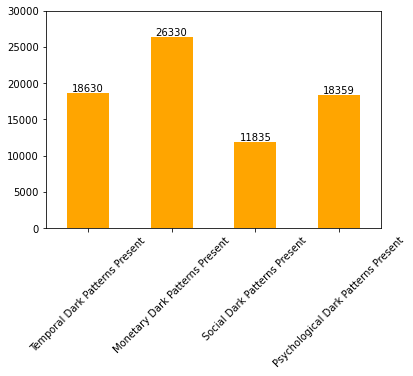

In [46]:
dark_patterns_df[['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 'Social Dark Patterns Present', 'Psychological Dark Patterns Present']].sum().plot(kind='bar', rot=45, color='orange', ylim=(0,30000))
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height()}", ha='center', va='bottom')

plt.savefig('BarDarkGamesPresent.pdf', format='pdf',bbox_inches='tight')

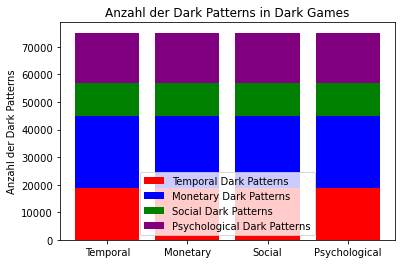

In [16]:
category_sums = dark_patterns_df[['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 'Social Dark Patterns Present', 'Psychological Dark Patterns Present']].sum()

fig, ax = plt.subplots()

patterns = ['Temporal', 'Monetary', 'Social', 'Psychological']
colors = ['red', 'blue', 'green', 'purple']
bottom = np.zeros(len(patterns))

pattern_values = []
for pattern in patterns:
    pattern_values.append(dark_patterns_df[f'{pattern} Dark Patterns Present'].sum())

for i, pattern in enumerate(patterns):
    ax.bar(patterns, pattern_values[i], bottom=bottom, color=colors[i], label=f'{pattern} Dark Patterns')
    bottom += pattern_values[i]

ax.set_ylabel('Anzahl der Dark Patterns')
ax.set_title('Anzahl der Dark Patterns in Dark Games')
ax.legend()

plt.show()

<AxesSubplot:ylabel='Density'>

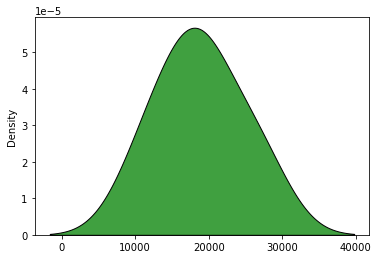

In [17]:
sum_df = dark_patterns_df[['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 
                           'Social Dark Patterns Present', 'Psychological Dark Patterns Present']].sum()

sns.kdeplot(sum_df, multiple='stack', color='g')

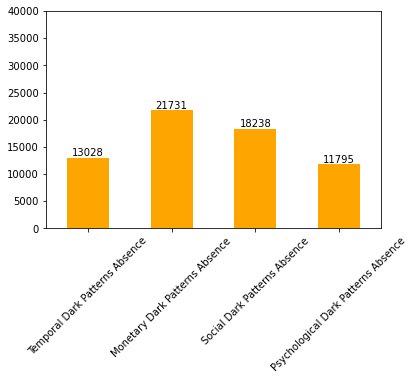

In [45]:
dark_patterns_df[['Temporal Dark Patterns Absence', 'Monetary Dark Patterns Absence', 'Social Dark Patterns Absence', 'Psychological Dark Patterns Absence']].sum().plot(kind='bar', color='orange',rot=45, ylim=(0,40000))
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height()}", ha='center', va='bottom')

plt.savefig('BarDarkGamesAbsence.pdf', format='pdf',bbox_inches='tight')

<AxesSubplot:ylabel='Density'>

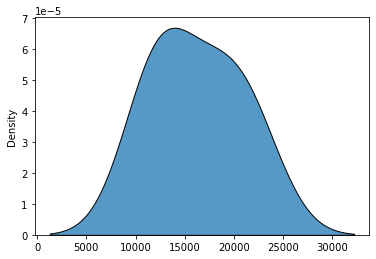

In [19]:
sum_df = dark_patterns_df[['Temporal Dark Patterns Absence', 'Monetary Dark Patterns Absence', 'Social Dark Patterns Absence', 'Psychological Dark Patterns Absence']].sum()

sns.kdeplot(sum_df, multiple='stack')

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

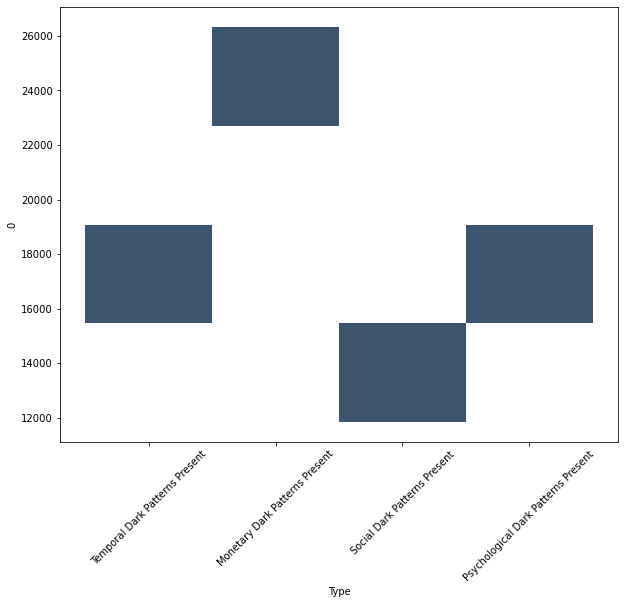

In [20]:
summed = dark_patterns_df[['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 'Social Dark Patterns Present', 'Psychological Dark Patterns Present']].sum()

data = pd.DataFrame(summed).reset_index()

fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(x='index', y=0, data=data, ax=ax)
plt.xlabel('Type')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='None-index'>

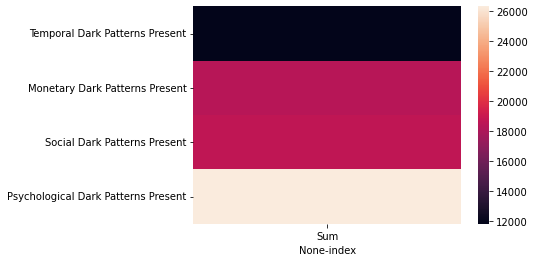

In [21]:
sns.heatmap(data.pivot(0, 'index').reset_index(), yticklabels=data['index'], xticklabels=['Sum'])

In [22]:
df = df.dropna()

df[(df['Temporal Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group())) > 1) 
   & (df['Monetary Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group())) > 1)
      & (df['Social Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group())) > 1)
          & (df['Psychological Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group())) > 1)]

,title,Price,Ads,In App Purchases,Temporal Dark Patterns,Monetary Dark Patterns,Social Dark Patterns,Psychological Dark Patterns
1,Knife Hit,Free,Yes,Yes,This game has 7 reported Temporal Dark Pattern...,This game has 11 reported Monetary Dark Patter...,This game has 7 reported Social Dark Patterns....,This game has 7 reported Psychological Dark Pa...
2,Walking Dead: Road to Survival,Free,Yes,Yes,This game has 27 reported Temporal Dark Patter...,This game has 44 reported Monetary Dark Patter...,This game has 26 reported Social Dark Patterns...,This game has 28 reported Psychological Dark P...
3,Unison League,Free,Yes,Yes,This game has 12 reported Temporal Dark Patter...,This game has 19 reported Monetary Dark Patter...,This game has 11 reported Social Dark Patterns...,This game has 10 reported Psychological Dark P...
4,War and Peace: Build an Army in the Epic Civil...,Free,Yes,Yes,This game has 7 reported Temporal Dark Pattern...,This game has 8 reported Monetary Dark Pattern...,This game has 5 reported Social Dark Patterns....,This game has 4 reported Psychological Dark Pa...
5,Cat Mario Run,$3.99,Yes,Unknown,This game has 22 reported Temporal Dark Patter...,This game has 33 reported Monetary Dark Patter...,This game has 21 reported Social Dark Patterns...,This game has 21 reported Psychological Dark P...
...,...,...,...,...,...,...,...,...
831,Limbus Company,Free,Unknown,Yes,This game has 22 reported Temporal Dark Patter...,This game has 65 reported Monetary Dark Patter...,This game has 8 reported Social Dark Patterns....,This game has 24 reported Psychological Dark P...
836,Mahjong Soul,Free,Unknown,Yes,This game has 6 reported Temporal Dark Pattern...,This game has 12 reported Monetary Dark Patter...,This game has 5 reported Social Dark Patterns....,This game has 8 reported Psychological Dark Pa...
837,Top War: Battle Game,Free,Yes,Yes,This game has 7 reported Temporal Dark Pattern...,This game has 9 reported Monetary Dark Pattern...,This game has 7 reported Social Dark Patterns....,This game has 6 reported Psychological Dark Pa...
841,BitLife - Life Simulator,Free,Yes,Yes,This game has 45 reported Temporal Dark Patter...,This game has 40 reported Monetary Dark Patter...,This game has 3 reported Social Dark Patterns....,This game has 35 reported Psychological Dark P...


In [23]:
df['Price'] = df['Price'].apply(lambda x: 'Not Free' if (x != 'Free') else 'Free')

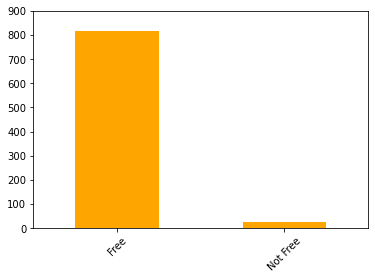

In [42]:
pd.value_counts(df["Price"]).plot.bar(rot=45, color='orange', ylim=(0,900))

plt.savefig('BarDarkGamesPrice.pdf', format='pdf',bbox_inches='tight')

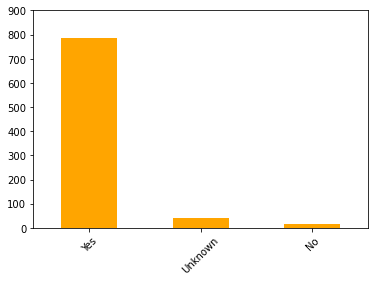

In [43]:
df['In App Purchases'] = df['In App Purchases'].fillna('Unknown')
pd.value_counts(df["In App Purchases"]).plot.bar(rot=45, color='orange', ylim=(0,900))

plt.savefig('BarDarkGamesinAppPurchases.pdf', format='pdf',bbox_inches='tight')

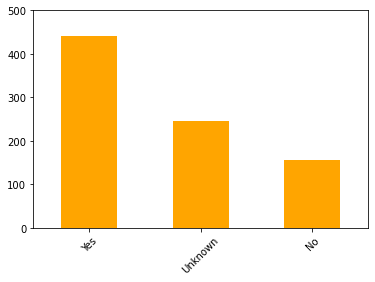

In [44]:
df['Ads'] = df['Ads'].fillna('Unknown')
pd.value_counts(df["Ads"]).plot.bar(rot=45, color='orange', ylim=(0,500))

plt.savefig('BarDarkGamesAds.pdf', format='pdf',bbox_inches='tight')

In [32]:
df.shape

(843, 8)